## Observations and Insights 

In [1]:
## 1: Capomulin and Ramicane are most successful drug regimens. The boxplots shows their range of values is much
## lower than the other 2 drugs of interest. These should be studied further.

## 2: The distribution of female vs male mice was very even throughout this study. We could look more closely at
## the Tumor Volume over time for female vs male in another study.

## 3: The weight of mice seems to have been rounded to the nearest integer. The scatter plot of tumor volume vs weight
## was concentrated at certain values (e.g. 17g, 24g). This seems to imply the mice's weight was consistent throughout
## the study, but if we measured with decimals, our scatter plot would be more spread out and more meaningful.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice, should be 249 per HW instructions
merge_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID.

# below will show the mouse with duplicate Timepoints, this is the mouse we'll drop from the DataFrame
# note: duplicate Timepoint is already removed
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df = merge_df[merge_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
# should be 248
merge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

merge_groupby = merge_df.groupby("Drug Regimen")

# calculate and store values in variables
tumor_mean = merge_groupby["Tumor Volume (mm3)"].mean()
tumor_median = merge_groupby["Tumor Volume (mm3)"].median()
tumor_var = merge_groupby["Tumor Volume (mm3)"].var()
tumor_std = merge_groupby["Tumor Volume (mm3)"].std()
tumor_sem = merge_groupby["Tumor Volume (mm3)"].sem()

# creating the summary DataFrame
summary_df = pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_var,
                          "Standard Deviation":tumor_std, "SEM":tumor_sem})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary1_df = merge_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary1_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

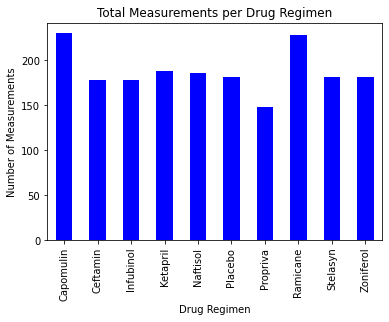

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# save count for measurement by each drug regimen
drug_counts = merge_groupby["Drug Regimen"].count()

drug_counts.plot(kind="bar", color='b')
plt.title("Total Measurements per Drug Regimen")
plt.ylabel("Number of Measurements")

Text(0.5, 0, 'Drug Regimen')

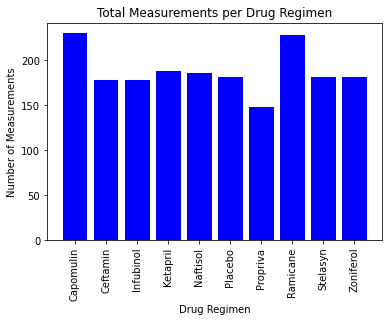

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
          "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
y_axis = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]
x_axis = np.arange(len(drugs))

plt.bar(drug_counts.index, drug_counts.values, color="b", align="center")
plt.xticks(x_axis, drugs, rotation='vertical')
plt.title("Total Measurements per Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xlabel("Drug Regimen")

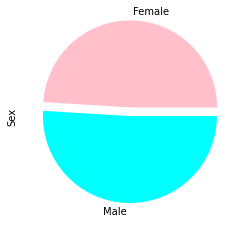

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# save count for each sex
sex_groupby = merge_df.groupby("Sex")
sex_count = sex_groupby["Sex"].count()

sex_count.plot(kind="pie", colors=["pink", "cyan"], explode=(0.1, 0))

Text(0.5, 1.0, 'Sex')

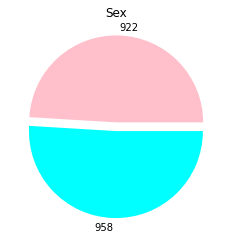

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(sex_count.values, explode=(0.1, 0), labels=sex_count, colors=["pink", "cyan"])
plt.title("Sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor_groupby = merge_df.groupby("Mouse ID").max()["Timepoint"]
max_tumor_groupby = max_tumor_groupby.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_mouse_df = pd.merge(max_tumor_groupby, merge_df, on=["Mouse ID", "Timepoint"], how="inner")

# data frame with only the 4 drug regmiens listed at max timepoints
four_regimen = max_mouse_df.loc[(max_mouse_df["Drug Regimen"] == "Capomulin") | (max_mouse_df["Drug Regimen"] == "Ramicane")| 
                                (max_mouse_df["Drug Regimen"] == "Infubinol") | (max_mouse_df["Drug Regimen"] == "Ceftamin")]

# final tumor volume of each mouse across the four drug regimens in the DF below:
four_regimen

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for x in treatments:
    tumor_vol.append(four_regimen[four_regimen["Drug Regimen"] == x]["Tumor Volume (mm3)"])
    

# new DataFrame for tumor volumes, remove index to avoid NaN values in DataFrame
tumor_vol_df = pd.DataFrame({"Capomulin":tumor_vol[0].reset_index(drop=True), 
                             "Ramicane":tumor_vol[1].reset_index(drop=True), 
                             "Infubinol":tumor_vol[2].reset_index(drop=True), 
                             "Ceftamin":tumor_vol[3].reset_index(drop=True)})
    
# Determine outliers using upper and lower bounds
quartiles = tumor_vol_df.quantile([0.25, 0.5, 0.75])

for x in treatments: 
    lowerq = quartiles[x][0.25]
    upperq = quartiles[x][0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x}: lower bound={lower_bound.round(2)}; upper bound={upper_bound.round(2)}")
    outliers = tumor_vol_df.loc[(tumor_vol_df[x] < lower_bound) | (tumor_vol_df[x] > upper_bound)]
    print(f"Outliers for {x} are: {outliers[x]}")
    print(f" ")
    

Capomulin: lower bound=20.7; upper bound=51.83
Outliers for Capomulin are: Series([], Name: Capomulin, dtype: float64)
 
Ramicane: lower bound=17.91; upper bound=54.31
Outliers for Ramicane are: Series([], Name: Ramicane, dtype: float64)
 
Infubinol: lower bound=36.83; upper bound=82.74
Outliers for Infubinol are: 5    36.321346
Name: Infubinol, dtype: float64
 
Ceftamin: lower bound=25.36; upper bound=87.67
Outliers for Ceftamin are: Series([], Name: Ceftamin, dtype: float64)
 


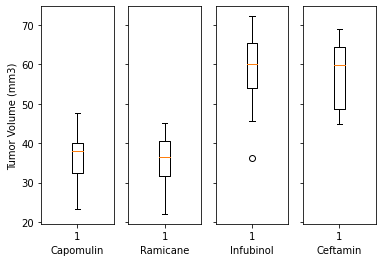

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, sharey=True)
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_df["Capomulin"])
ax1.set_xlabel("Capomulin")

ax2.boxplot(tumor_vol_df["Ramicane"])
ax2.set_xlabel("Ramicane")

ax3.boxplot(tumor_vol_df["Infubinol"])
ax3.set_xlabel("Infubinol")

ax4.boxplot(tumor_vol_df["Ceftamin"])
ax4.set_xlabel("Ceftamin")
plt.show()

## Line and Scatter Plots

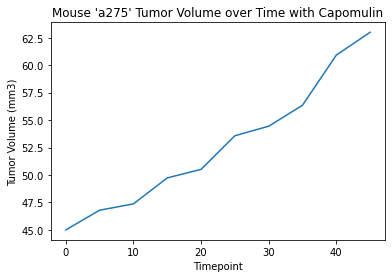

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_mouse = merge_df[merge_df["Mouse ID"] == "a275"]
capo_mouse = capo_mouse[["Timepoint", "Tumor Volume (mm3)"]]
capo_mouse.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse 'a275' Tumor Volume over Time with Capomulin")
plt.show()

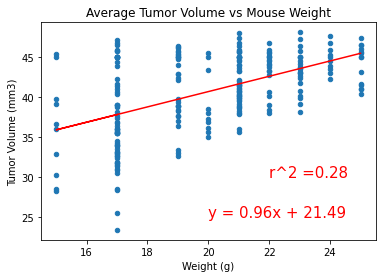

The r^2 value is: 0.2763600223455911
The r correlation factor is: 0.5256995552077166


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# DataFrame for only Capomulin mice
capo_mice = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", ]

# plot
capo_mice.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", legend=False)
#capo_mice.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Weight with Capomulin")

x_values = capo_mice['Weight (g)']
y_values = capo_mice['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.annotate(f'r^2 ={round(rvalue**2,2)}',(22,30),fontsize=15,color="red")
plt.title('Average Tumor Volume vs Mouse Weight')
plt.show()
print(f'The r^2 value is: {rvalue**2}')
print(f'The r correlation factor is: {rvalue}')